In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv(r'Downloads\covid_19_clean_complete.csv')

In [3]:
df

Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [4]:
df.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [5]:
df.rename(columns={"Date":"date",
                   "Province/State":"state",
                "Country/Region":"country",
         "Lat":"lat","Long":"long",
         "Confirmed":"confirmed",
         "Deaths":"deaths",
         "Recovered":"recovered"},inplace = True)

In [6]:
df

state                country        lat       long        date  \
0       NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1       NaN                Albania  41.153300  20.168300  2020-01-22   
2       NaN                Algeria  28.033900   1.659600  2020-01-22   
3       NaN                Andorra  42.506300   1.521800  2020-01-22   
4       NaN                 Angola -11.202700  17.873900  2020-01-22   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       confirmed  deaths  recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [7]:
df["active"] = df["confirmed"] - df["deaths"] - df["recovered"]

In [8]:
df

state                country        lat       long        date  \
0       NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1       NaN                Albania  41.153300  20.168300  2020-01-22   
2       NaN                Algeria  28.033900   1.659600  2020-01-22   
3       NaN                Andorra  42.506300   1.521800  2020-01-22   
4       NaN                 Angola -11.202700  17.873900  2020-01-22   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       confirmed  deaths  recovered  Active             WHO Region  active  
0              0       0          0       0  Eastern Mediterranean       0  
1              0       0          0       0                 Europe       0  
2              0       0          0       0                 Africa       0  
3              0       0          0       0                 Europe       0  
4              0       0          0       0                 Africa       0  
...          ...     ...        ...     ...                    ...     ...  
49063        865      14        734     117                 Africa     117  
49064       1691     483        833     375  Eastern Mediterranean     375  
49065        354       7        328      19                 Africa      19  
49066       7235      60       6028    1147                 Europe    1147  
49067        505      12        128     365                 Africa     365  

[49068 rows x 11 columns]

In [9]:
top = df[df["date"] == df["date"].max()]
top
world = top.groupby("country")["confirmed","active","deaths"].sum().reset_index()
world.head()

country  confirmed  active  deaths
0  Afghanistan      36263    9796    1269
1      Albania       4880    1991     144
2      Algeria      27973    7973    1163
3      Andorra        907      52      52
4       Angola        950     667      41

In [10]:
df['active'].sort_values()

34669        -14
34147        -13
34408        -13
33886        -10
16760         -6
          ...   
47986    2661117
48247    2705347
48508    2753091
48769    2789125
49030    2816444
Name: active, Length: 49068, dtype: int64

In [11]:
world['active'].max()

2816444

In [12]:
figure = px.choropleth(world,locations = "country",
                       locationmode = "country names", color="active",
                       hover_name = "country",range_color=[1,100000],
                       color_continuous_scale = "reds",
                       title = "Countries with active cases")
figure.show()

[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

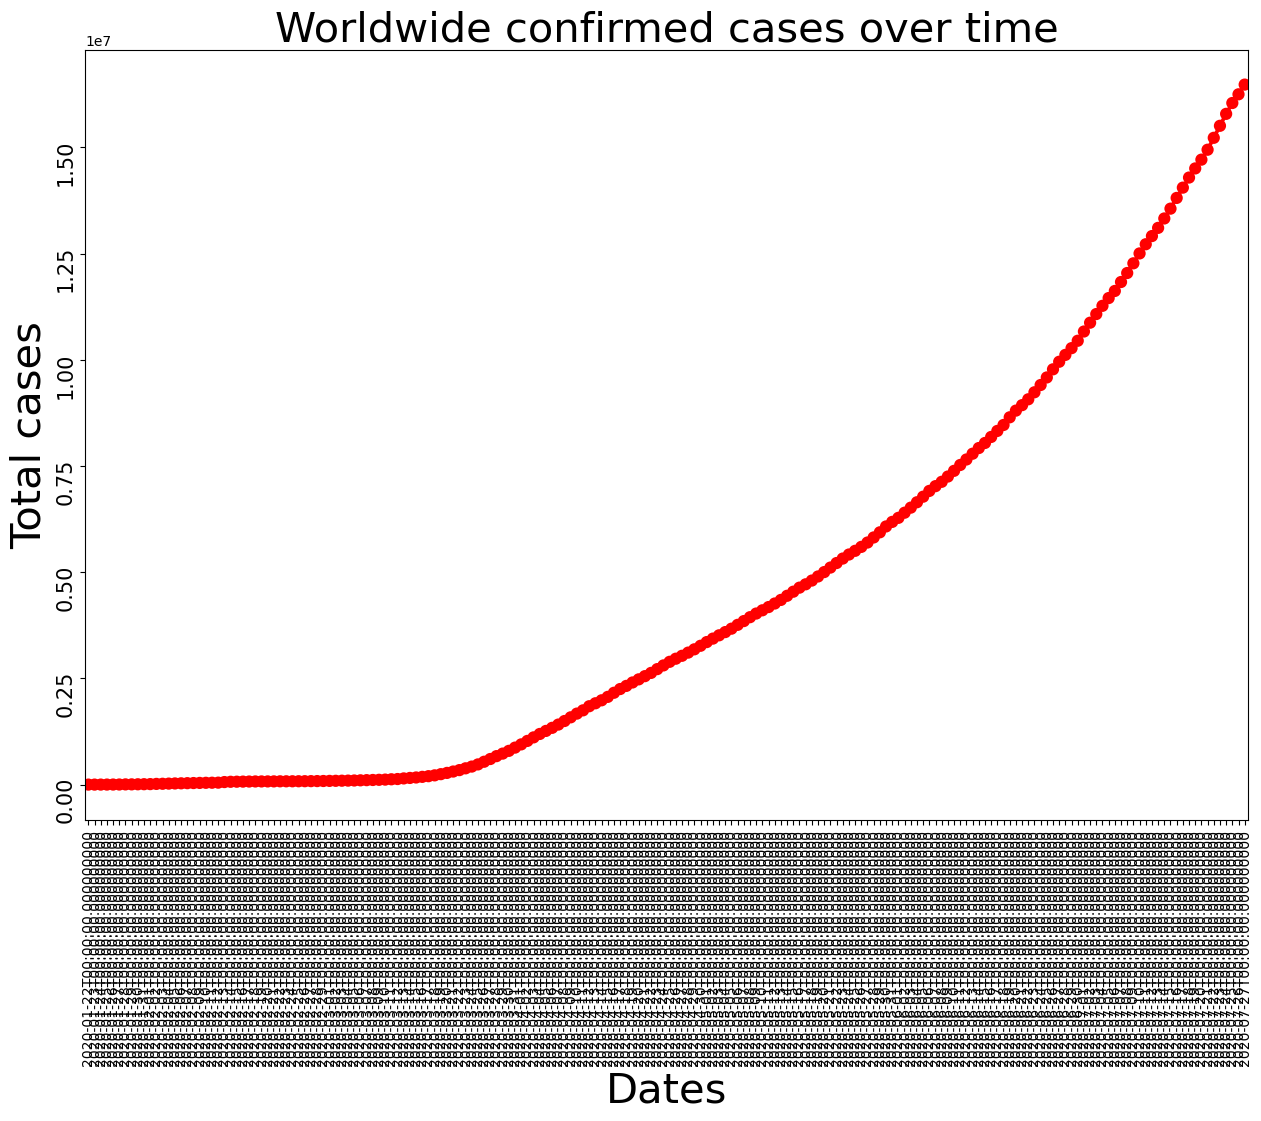

In [13]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize=15)
plt.xlabel("dates",fontsize=30)
plt.ylabel("total cases",fontsize=30)
plt.yticks(rotation = 90)
plt.title("Worldwide confirmed cases over time",fontsize=30)
total_cases = df.groupby("date")['date','confirmed'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])

ax = sns.pointplot(x=total_cases.date, y=total_cases.confirmed,color= 'r')
ax.set(xlabel="Dates",ylabel="Total cases")

In [14]:
top_actives = top.groupby(by="country")["active"].sum().sort_values(ascending=False).head(20).reset_index()
top_actives

country   active
0               US  2816444
1           Brazil   508116
2            India   495499
3   United Kingdom   254427
4           Russia   201097
5     South Africa   170537
6         Colombia   117163
7           France   108928
8           Canada   107514
9             Peru    98752
10      Bangladesh    97577
11           Spain    93613
12       Argentina    91782
13          Sweden    73695
14     Philippines    53649
15           Egypt    52992
16          Mexico    47657
17     Netherlands    47064
18         Bolivia    47056
19    Saudi Arabia    43238

[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

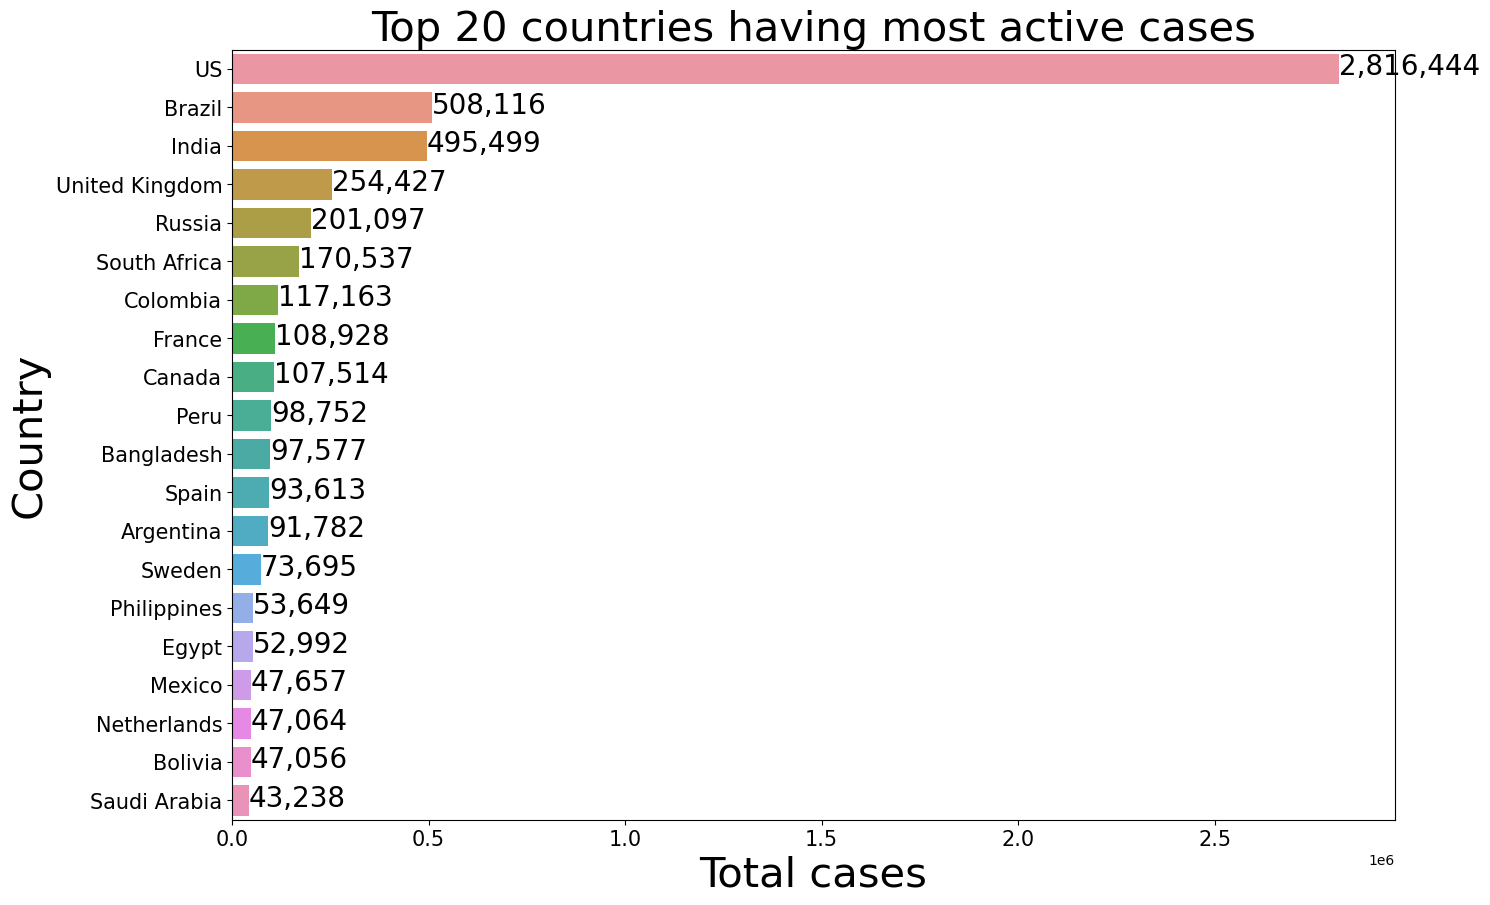

In [15]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most active cases",fontsize=30)
ax = sns.barplot(x=top_actives.active, y=top_actives.country)
for i, (value,name) in enumerate(zip(top_actives.active,top_actives.country)):
    ax.text(value, i-.05,f'{value:,.0f}', size=20,ha="left",va="center")
ax.set(xlabel="Total cases",ylabel="Country")

In [16]:
top_deaths = top.groupby(by="country")["deaths"].sum().sort_values(ascending=False).head(20).reset_index()
top_deaths

country  deaths
0               US  148011
1           Brazil   87618
2   United Kingdom   45844
3           Mexico   44022
4            Italy   35112
5            India   33408
6           France   30212
7            Spain   28432
8             Peru   18418
9             Iran   15912
10          Russia   13334
11         Belgium    9822
12           Chile    9187
13         Germany    9125
14          Canada    8944
15        Colombia    8777
16    South Africa    7067
17     Netherlands    6160
18        Pakistan    5842
19          Sweden    5700

[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

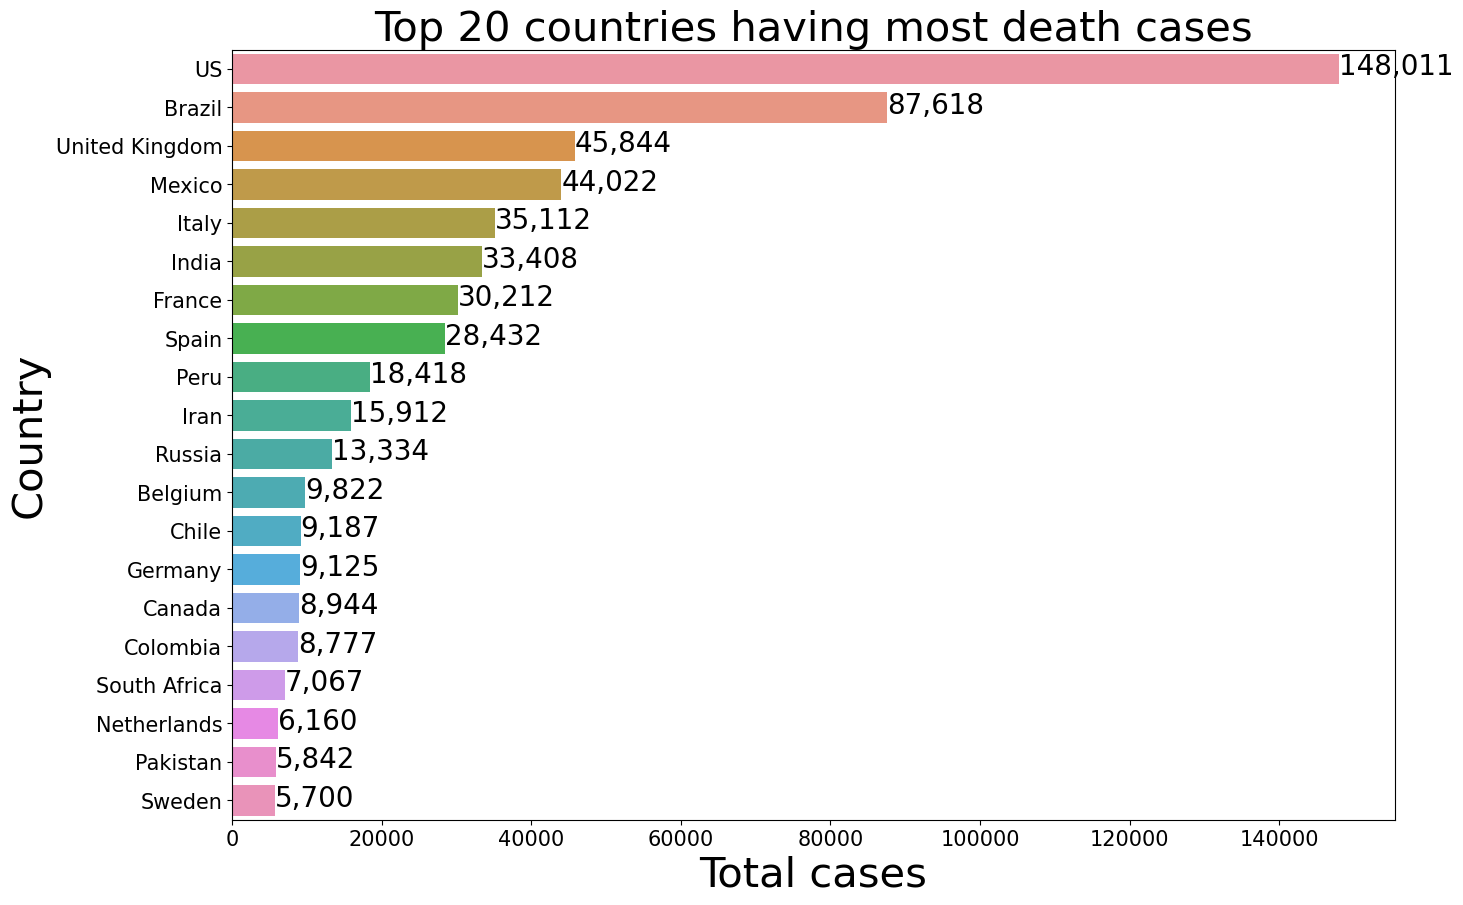

In [17]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most death cases",fontsize=30)
ax = sns.barplot(x=top_deaths.deaths, y=top_deaths.country)
for i, (value,name) in enumerate(zip(top_deaths.deaths,top_deaths.country)):
    ax.text(value, i-.05,f'{value:,.0f}', size=20,ha="left",va="center")
ax.set(xlabel="Total cases",ylabel="Country")

In [18]:
recovery = top.groupby(by="country")["recovered"].sum().sort_values(ascending=False).head(20).reset_index()
recovery

country  recovered
0         Brazil    1846641
1             US    1325804
2          India     951166
3         Russia     602249
4          Chile     319954
5         Mexico     303810
6   South Africa     274925
7           Peru     272547
8           Iran     255144
9       Pakistan     241026
10  Saudi Arabia     222936
11        Turkey     210469
12         Italy     198593
13       Germany     190314
14         Spain     150376
15      Colombia     131161
16    Bangladesh     125683
17         Qatar     106328
18        France      81212
19         China      78869

[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

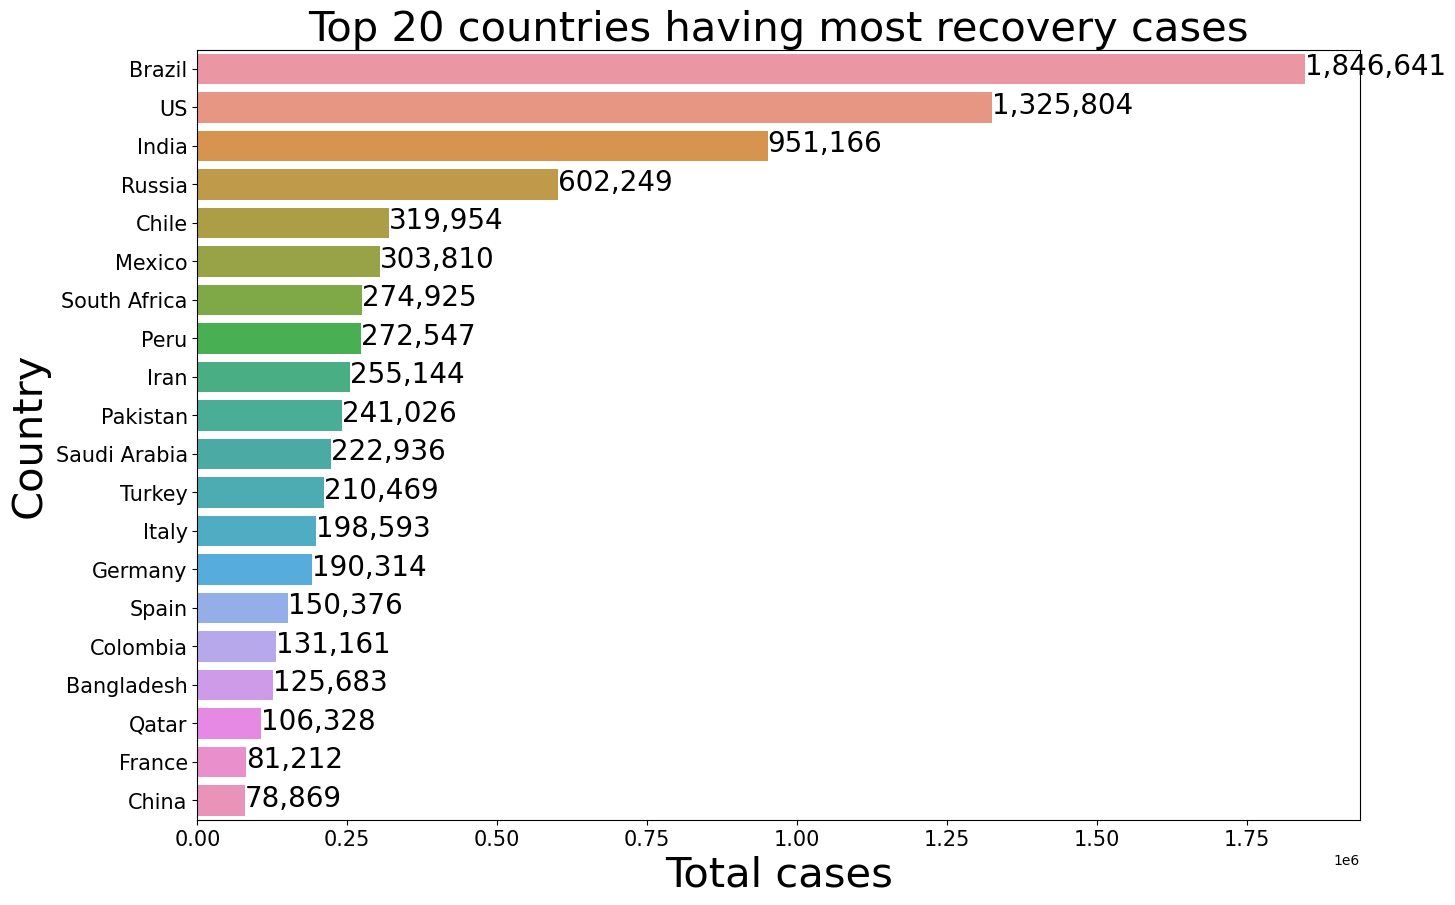

In [19]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most recovery cases",fontsize=30)
ax = sns.barplot(x=recovery.recovered, y=recovery.country)
for i, (value,name) in enumerate(zip(recovery.recovered,recovery.country)):
    ax.text(value, i-.05,f'{value:,.0f}', size=20,ha="left",va="center")
ax.set(xlabel="Total cases",ylabel="Country")

In [20]:
brazil = df[df.country == "Brazil"]
brazil = brazil.groupby("date")["recovered","deaths","active","confirmed"].sum().reset_index()
brazil

date  recovered  deaths  active  confirmed
0    2020-01-22          0       0       0          0
1    2020-01-23          0       0       0          0
2    2020-01-24          0       0       0          0
3    2020-01-25          0       0       0          0
4    2020-01-26          0       0       0          0
..          ...        ...     ...     ...        ...
183  2020-07-23    1620313   84082  583080    2287475
184  2020-07-24    1693214   85238  564914    2343366
185  2020-07-25    1785359   86449  522705    2394513
186  2020-07-26    1812913   87004  519174    2419091
187  2020-07-27    1846641   87618  508116    2442375

[188 rows x 5 columns]

In [21]:
brazil.sort_values(by="date", ascending = False)

date  recovered  deaths  active  confirmed
187  2020-07-27    1846641   87618  508116    2442375
186  2020-07-26    1812913   87004  519174    2419091
185  2020-07-25    1785359   86449  522705    2394513
184  2020-07-24    1693214   85238  564914    2343366
183  2020-07-23    1620313   84082  583080    2287475
..          ...        ...     ...     ...        ...
4    2020-01-26          0       0       0          0
3    2020-01-25          0       0       0          0
2    2020-01-24          0       0       0          0
1    2020-01-23          0       0       0          0
0    2020-01-22          0       0       0          0

[188 rows x 5 columns]

In [22]:
us = df[df.country == "US"]
us = us.groupby("date")["recovered","deaths","active","confirmed"].sum().reset_index()
us

date  recovered  deaths   active  confirmed
0    2020-01-22          0       0        1          1
1    2020-01-23          0       0        1          1
2    2020-01-24          0       0        2          2
3    2020-01-25          0       0        2          2
4    2020-01-26          0       0        5          5
..          ...        ...     ...      ...        ...
183  2020-07-23    1233269  144430  2661117    4038816
184  2020-07-24    1261624  145560  2705347    4112531
185  2020-07-25    1279414  146465  2753091    4178970
186  2020-07-26    1297863  146935  2789125    4233923
187  2020-07-27    1325804  148011  2816444    4290259

[188 rows x 5 columns]

In [23]:
us.sort_values(by="date", ascending=False)

date  recovered  deaths   active  confirmed
187  2020-07-27    1325804  148011  2816444    4290259
186  2020-07-26    1297863  146935  2789125    4233923
185  2020-07-25    1279414  146465  2753091    4178970
184  2020-07-24    1261624  145560  2705347    4112531
183  2020-07-23    1233269  144430  2661117    4038816
..          ...        ...     ...      ...        ...
4    2020-01-26          0       0        5          5
3    2020-01-25          0       0        2          2
2    2020-01-24          0       0        2          2
1    2020-01-23          0       0        1          1
0    2020-01-22          0       0        1          1

[188 rows x 5 columns]

In [24]:
india = df[df.country == "India"]
india = india.groupby("date")["recovered","deaths","active","confirmed"].sum().reset_index()
india

date  recovered  deaths  active  confirmed
0    2020-01-22          0       0       0          0
1    2020-01-23          0       0       0          0
2    2020-01-24          0       0       0          0
3    2020-01-25          0       0       0          0
4    2020-01-26          0       0       0          0
..          ...        ...     ...     ...        ...
183  2020-07-23     817209   30601  440298    1288108
184  2020-07-24     849432   31358  456234    1337024
185  2020-07-25     885573   32060  468002    1385635
186  2020-07-26     917568   32771  485277    1435616
187  2020-07-27     951166   33408  495499    1480073

[188 rows x 5 columns]

In [25]:
india.sort_values(by="date",ascending=False)

date  recovered  deaths  active  confirmed
187  2020-07-27     951166   33408  495499    1480073
186  2020-07-26     917568   32771  485277    1435616
185  2020-07-25     885573   32060  468002    1385635
184  2020-07-24     849432   31358  456234    1337024
183  2020-07-23     817209   30601  440298    1288108
..          ...        ...     ...     ...        ...
4    2020-01-26          0       0       0          0
3    2020-01-25          0       0       0          0
2    2020-01-24          0       0       0          0
1    2020-01-23          0       0       0          0
0    2020-01-22          0       0       0          0

[188 rows x 5 columns]

In [26]:
russia = df[df.country == "Russia"]
russia = russia.groupby("date")["recovered","deaths","active","confirmed"].sum().reset_index()
russia

date  recovered  deaths  active  confirmed
0    2020-01-22          0       0       0          0
1    2020-01-23          0       0       0          0
2    2020-01-24          0       0       0          0
3    2020-01-25          0       0       0          0
4    2020-01-26          0       0       0          0
..          ...        ...     ...     ...        ...
183  2020-07-23     579295   12873  201552     793720
184  2020-07-24     587728   13026  198745     799499
185  2020-07-25     596064   13172  196096     805332
186  2020-07-26     599172   13249  198652     811073
187  2020-07-27     602249   13334  201097     816680

[188 rows x 5 columns]

In [27]:
russia.sort_values(by="date",ascending=False)

date  recovered  deaths  active  confirmed
187  2020-07-27     602249   13334  201097     816680
186  2020-07-26     599172   13249  198652     811073
185  2020-07-25     596064   13172  196096     805332
184  2020-07-24     587728   13026  198745     799499
183  2020-07-23     579295   12873  201552     793720
..          ...        ...     ...     ...        ...
4    2020-01-26          0       0       0          0
3    2020-01-25          0       0       0          0
2    2020-01-24          0       0       0          0
1    2020-01-23          0       0       0          0
0    2020-01-22          0       0       0          0

[188 rows x 5 columns]

In [28]:
uk = df[df.country == "United Kingdom"]
uk = uk.groupby("date")["recovered","deaths","active","confirmed"].sum().reset_index()
uk

date  recovered  deaths  active  confirmed
0    2020-01-22          0       0       0          0
1    2020-01-23          0       0       0          0
2    2020-01-24          0       0       0          0
3    2020-01-25          0       0       0          0
4    2020-01-26          0       0       0          0
..          ...        ...     ...     ...        ...
183  2020-07-23       1425   45639  251667     298731
184  2020-07-24       1425   45762  252313     299500
185  2020-07-25       1427   45823  253020     300270
186  2020-07-26       1434   45837  253749     301020
187  2020-07-27       1437   45844  254427     301708

[188 rows x 5 columns]

In [29]:
uk.sort_values(by="date",ascending=False)

date  recovered  deaths  active  confirmed
187  2020-07-27       1437   45844  254427     301708
186  2020-07-26       1434   45837  253749     301020
185  2020-07-25       1427   45823  253020     300270
184  2020-07-24       1425   45762  252313     299500
183  2020-07-23       1425   45639  251667     298731
..          ...        ...     ...     ...        ...
4    2020-01-26          0       0       0          0
3    2020-01-25          0       0       0          0
2    2020-01-24          0       0       0          0
1    2020-01-23          0       0       0          0
0    2020-01-22          0       0       0          0

[188 rows x 5 columns]

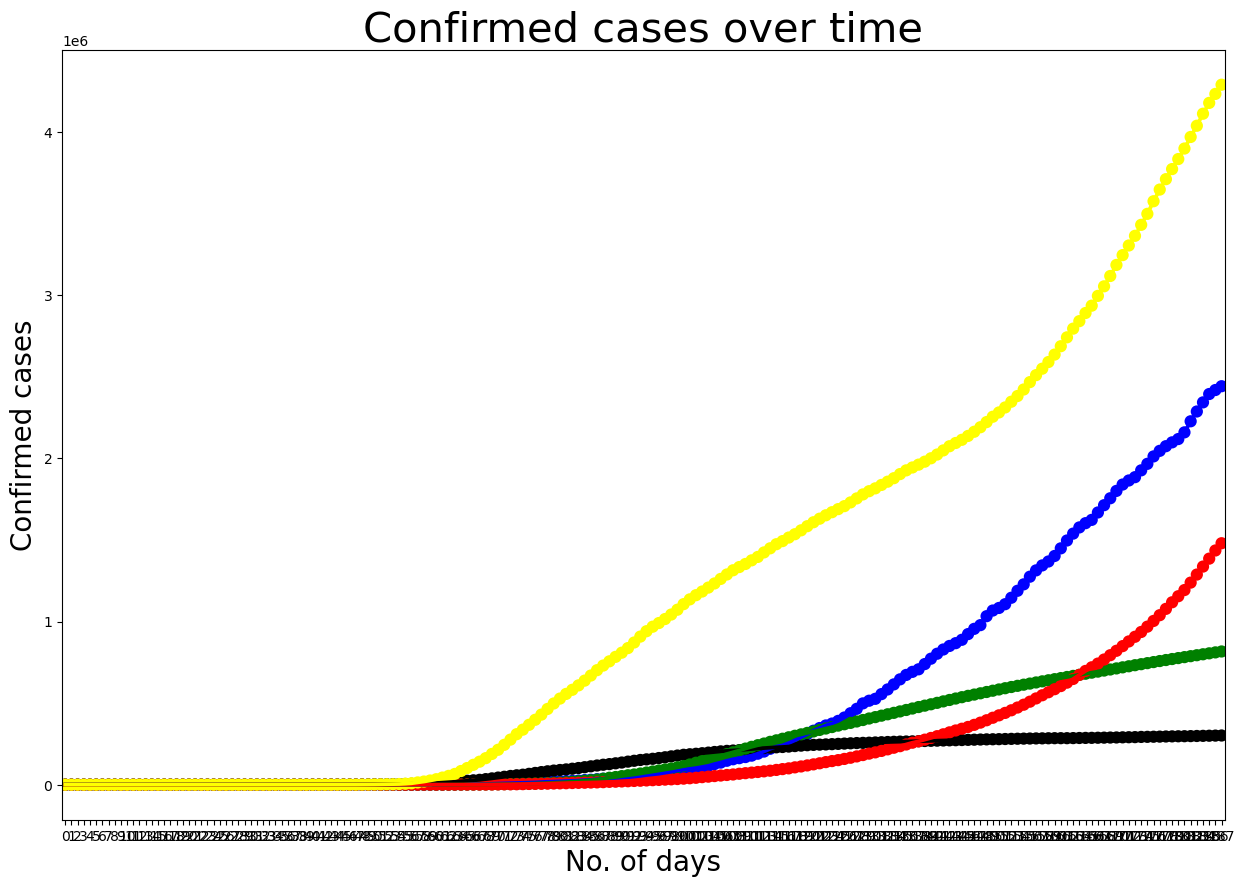

In [30]:
plt.figure(figsize=(15,10))
sns.pointplot(brazil.index,brazil.confirmed,color="Blue")
sns.pointplot(uk.index,uk.confirmed,color="Black")
sns.pointplot(russia.index,russia.confirmed,color="Green")
sns.pointplot(india.index,india.confirmed,color="Red")
sns.pointplot(us.index,us.confirmed,color="Yellow")
plt.xlabel('No. of days',fontsize=20)
plt.ylabel('Confirmed cases',fontsize=20)
plt.title('Confirmed cases over time', fontsize=30)
plt.show()

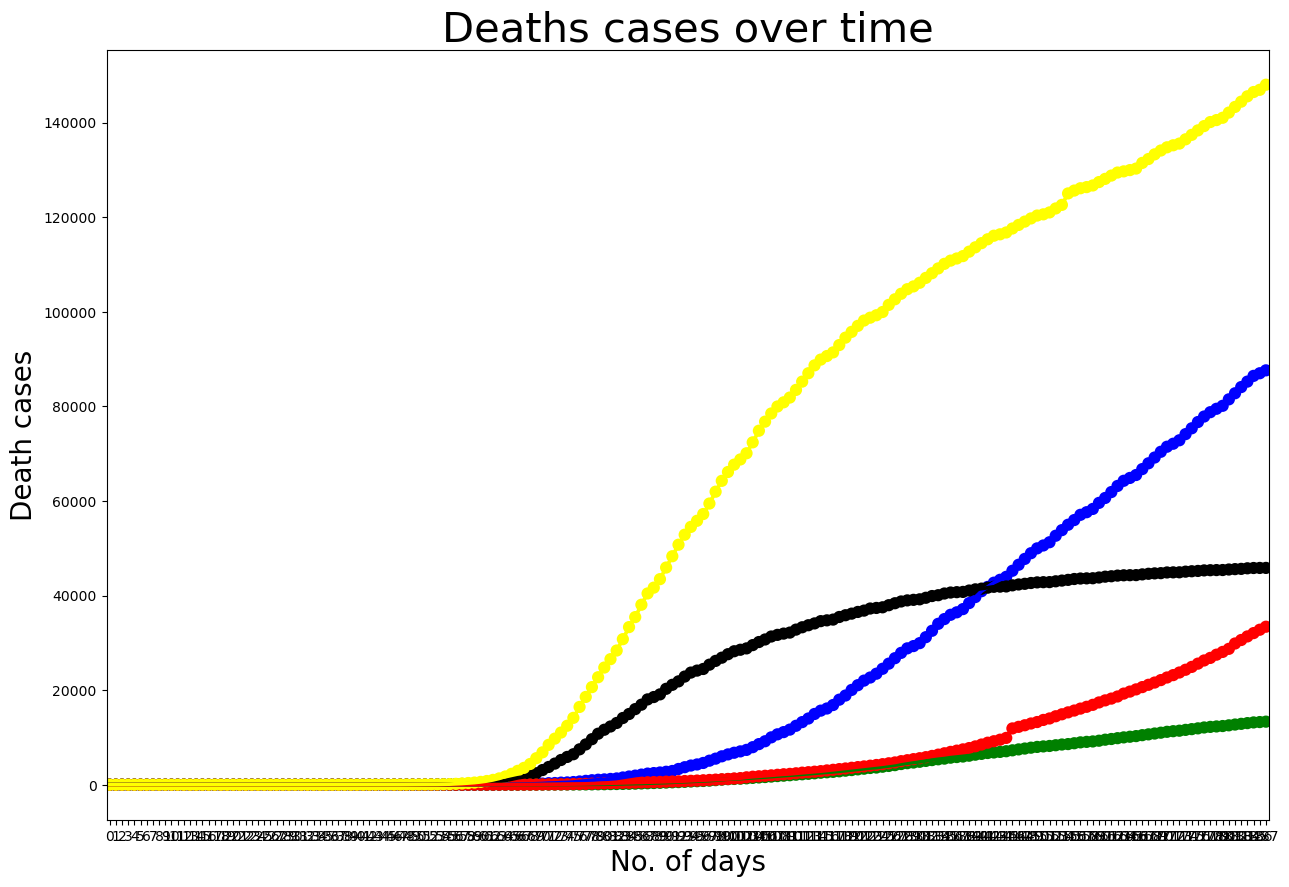

In [31]:
plt.figure(figsize=(15,10))
sns.pointplot(brazil.index,brazil.deaths,color="Blue")
sns.pointplot(uk.index,uk.deaths,color="Black")
sns.pointplot(russia.index,russia.deaths,color="Green")
sns.pointplot(india.index,india.deaths,color="Red")
sns.pointplot(us.index,us.deaths,color="Yellow")
plt.xlabel('No. of days',fontsize=20)
plt.ylabel('Death cases',fontsize=20)
plt.title('Deaths cases over time', fontsize=30)
plt.show()

In [32]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [33]:
from prophet import Prophet

In [34]:
import os
os

<module 'os' from 'C:\\Users\\HP\\anaconda3\\lib\\os.py'>

In [35]:
data=pd.read_csv(r'Downloads\covid_19_clean_complete.csv',parse_dates=['Date'])

In [36]:
data.head()

Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0   
1            NaN        Albania  41.15330  20.168300 2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600 2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800 2020-01-22          0   
4            NaN         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [37]:
total_active=data['Active'].sum()
print('Total no of active cases',total_active)

Total no of active cases 396715350


In [38]:
Confirmed=data.groupby('Date').sum(['confirmed']).reset_index()
Deaths=data.groupby('Date').sum(['death']).reset_index()
Recovered=data.groupby('Date').sum(['recovered']).reset_index()
Recovered.head()

Date         Lat         Long  Confirmed  Deaths  Recovered  Active
0 2020-01-22  5594.20365  6140.869714        555      17         28     510
1 2020-01-23  5594.20365  6140.869714        654      18         30     606
2 2020-01-24  5594.20365  6140.869714        941      26         36     879
3 2020-01-25  5594.20365  6140.869714       1434      42         39    1353
4 2020-01-26  5594.20365  6140.869714       2118      56         52    2010

In [42]:
confirmed=data.groupby('Date').sum()['Confirmed'].reset_index()
deaths=data.groupby('Date').sum()['Deaths'].reset_index()
confirmed

Date  Confirmed
0   2020-01-22        555
1   2020-01-23        654
2   2020-01-24        941
3   2020-01-25       1434
4   2020-01-26       2118
..         ...        ...
183 2020-07-23   15510481
184 2020-07-24   15791645
185 2020-07-25   16047190
186 2020-07-26   16251796
187 2020-07-27   16480485

[188 rows x 2 columns]

In [45]:
confirmed.columns=['ds','y']
confirmed ['ds']=pd.to_datetime(confirmed['ds'])

In [46]:
confirmed

ds         y
0   2020-01-22       555
1   2020-01-23       654
2   2020-01-24       941
3   2020-01-25      1434
4   2020-01-26      2118
..         ...       ...
183 2020-07-23  15510481
184 2020-07-24  15791645
185 2020-07-25  16047190
186 2020-07-26  16251796
187 2020-07-27  16480485

[188 rows x 2 columns]

In [48]:
m=Prophet(interval_width=0.95)
m.fit(confirmed)
future=m.make_future_dataframe(periods=7)
future.tail(7)

16:33:45 - cmdstanpy - INFO - Chain [1] start processing
16:33:45 - cmdstanpy - INFO - Chain [1] done processing


ds
188 2020-07-28
189 2020-07-29
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

In [50]:
forecast=m.predict(future)
forecast.tail(7)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
190 2020-07-30  1.674387e+07  1.658352e+07  1.690671e+07
191 2020-07-31  1.695904e+07  1.680091e+07  1.712995e+07
192 2020-08-01  1.716673e+07  1.700510e+07  1.733580e+07
193 2020-08-02  1.736428e+07  1.718885e+07  1.753680e+07
194 2020-08-03  1.755891e+07  1.737220e+07  1.773355e+07

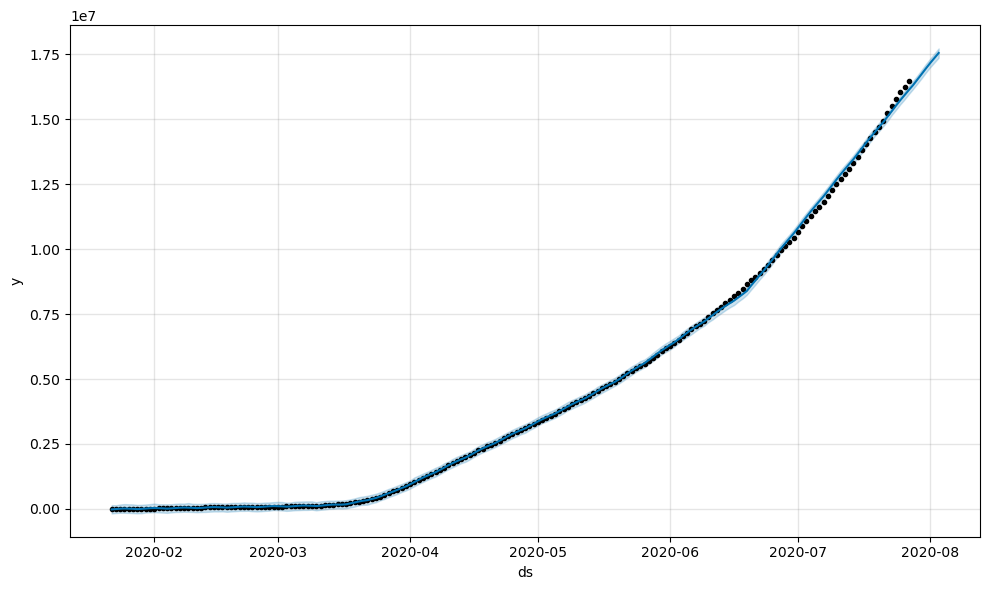

In [52]:
deaths_forecast_plot=m.plot(forecast)